### Imports

In [1]:
import pandas as pd 
import numpy as np 

from tensorflow import keras
import os

import soundfile as sf

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 

import librosa 

import warnings
warnings.filterwarnings('ignore')

2023-08-01 21:45:35.560855: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Audio Files

In [2]:
pop_audio = "/Users/kellyjara/Desktop/Project 5 (copy)/Data/genres_original/pop/pop.00010.wav"
pop, sr = librosa.load(pop_audio)

In [3]:
classical_audio = '/Users/kellyjara/Desktop/Project 5 (copy)/Data/genres_original/classical/classical.00094.wav'
classic, sr = librosa.load(classical_audio)

In [4]:
metal_audio = '/Users/kellyjara/Desktop/Project 5 (copy)/Data/genres_original/metal/metal.00078.wav'
metal, sr = librosa.load(metal_audio)

### Sound Wave

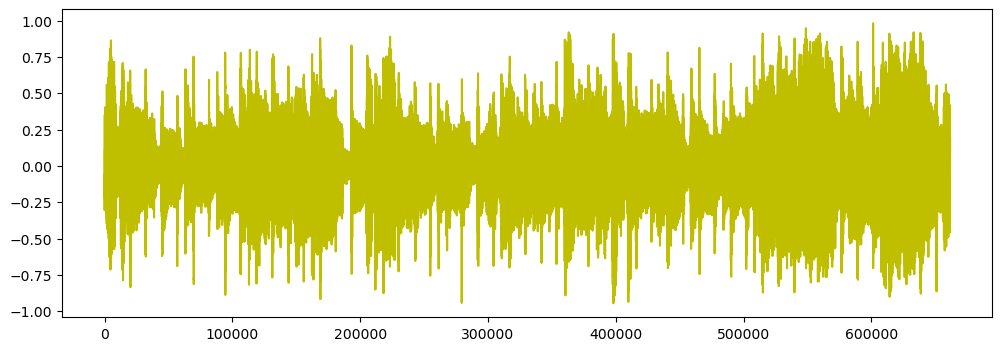

In [5]:
plt.figure(figsize = (12,4))
plt.plot(pop, color = 'y')
plt.show()

#sound as time (x-axis)
#amplitude (y-axis)

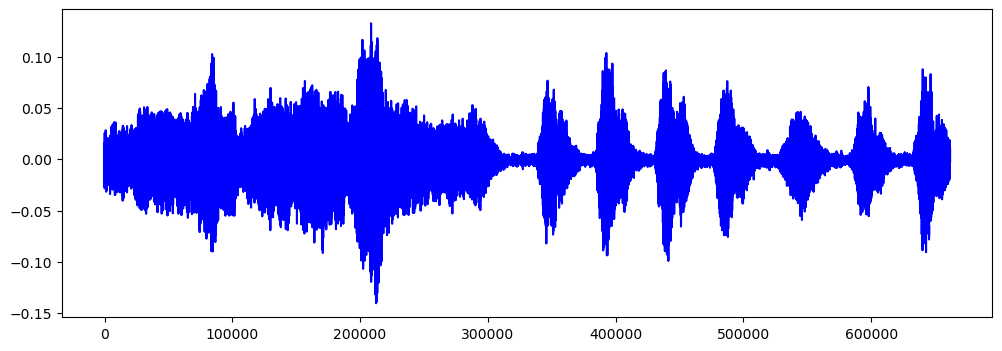

In [6]:
plt.figure(figsize = (12,4))
plt.plot(classic, color = 'b')
plt.show()

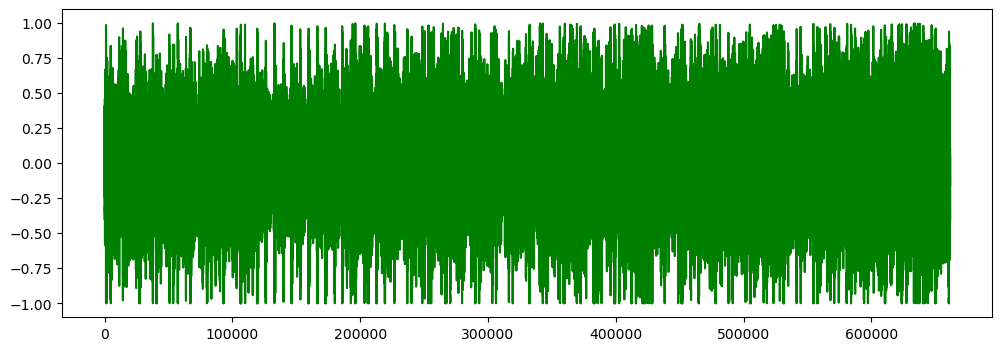

In [7]:
plt.figure(figsize = (12,4))
plt.plot(metal, color = 'g')
plt.show()

### Harmonic & Percussive Waveforms

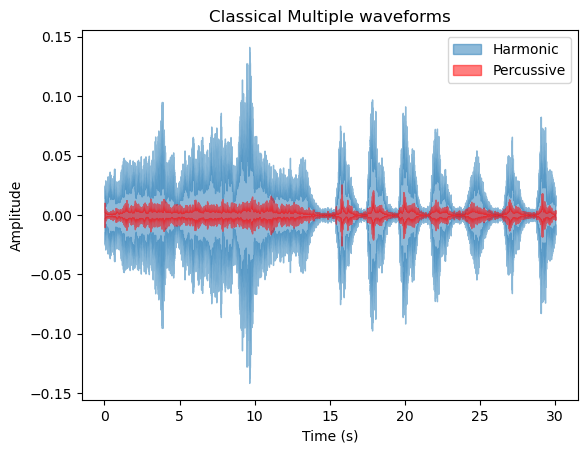

In [59]:
fig, ax = plt.subplots(sharex=True)

y_harm, y_perc = librosa.effects.hpss(classic)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax, label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax, label='Percussive')
ax.set(title='Classical Multiple waveforms')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')

ax.legend()

plt.show()

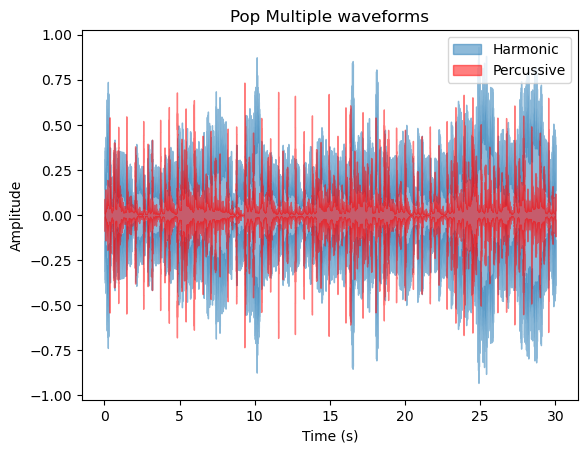

In [57]:
fig, ax = plt.subplots(sharex=True)

y_harm, y_perc = librosa.effects.hpss(pop)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax, label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax, label='Percussive')
ax.set(title='Pop Multiple waveforms')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.legend()

plt.show()

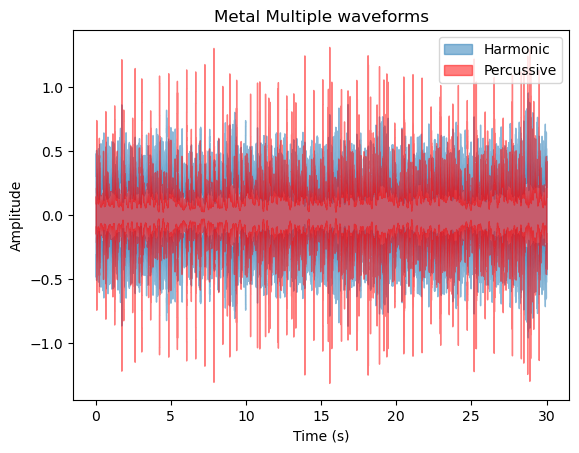

In [60]:
fig, ax = plt.subplots(sharex=True)

y_harm, y_perc = librosa.effects.hpss(metal)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax, label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax, label='Percussive')
ax.set(title='Metal Multiple waveforms')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.legend()

plt.show()

### Chroma Features

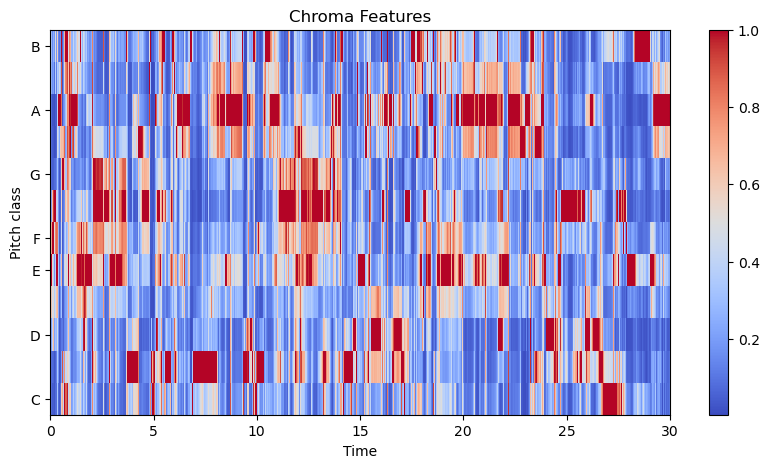

In [11]:
chroma = librosa.feature.chroma_stft(y = pop, sr=sr)
plt.figure(figsize = (10,5))
librosa.display.specshow(chroma, sr=sr, x_axis = 'time', y_axis = 'chroma', cmap = 'coolwarm')
plt.colorbar()
plt.title('Chroma Features')
plt.show()

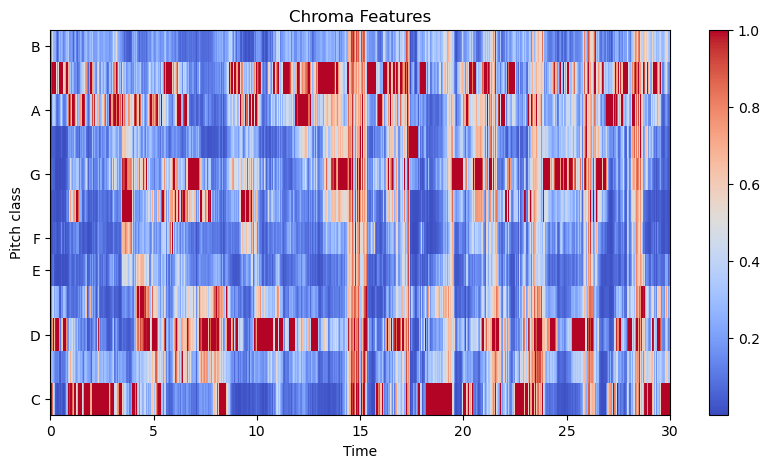

In [12]:
chroma = librosa.feature.chroma_stft(y = classic, sr=sr)
plt.figure(figsize = (10,5))
librosa.display.specshow(chroma, sr=sr, x_axis = 'time', y_axis = 'chroma', cmap = 'coolwarm')
plt.colorbar()
plt.title('Chroma Features')
plt.show()

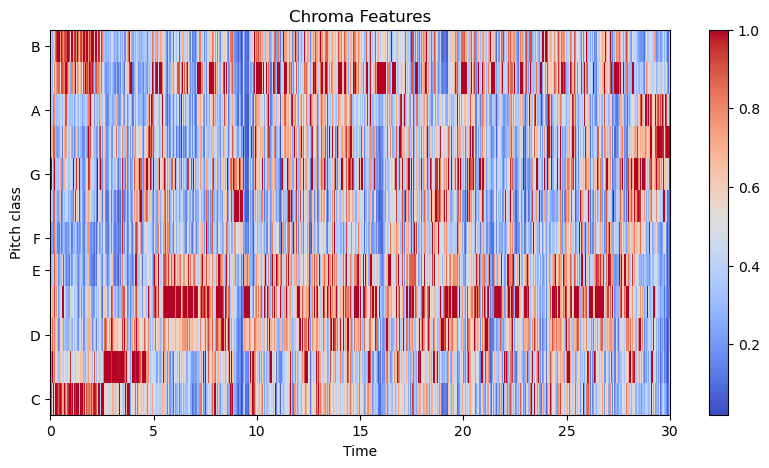

In [13]:
chroma = librosa.feature.chroma_stft(y = metal, sr=sr)
plt.figure(figsize = (10,5))
librosa.display.specshow(chroma, sr=sr, x_axis = 'time', y_axis = 'chroma', cmap = 'coolwarm')
plt.colorbar()
plt.title('Chroma Features')
plt.show()

### More Visual Examples

In [32]:
example_file = "/Users/kellyjara/Desktop/Project 5 (copy)/Data/genres_original/blues/blues.00040.wav"

In [37]:
# creating function to obtain MFCC, mel spectogram, chroma vector

def get_mfcc(wav_file_path):

    y, sr = librosa.load(wav_file_path, offset=0, duration=30)
    mfcc = np.array(librosa.feature.mfcc(y=y, sr=sr))
    return mfcc

def get_melspectrogram(wav_file_path):
    y, sr = librosa.load(wav_file_path, offset=0, duration=30)
    melspectrogram = np.array(librosa.feature.melspectrogram(y=y, sr=sr))
    mel_spec_db = librosa.power_to_db(melspectrogram, ref=np.max)
    return mel_spec_db

def get_chroma_vector(wav_file_path):
    y, sr = librosa.load(wav_file_path)
    chroma = np.array(librosa.feature.chroma_stft(y=y, sr=sr))
    return chroma

def get_spectral_centroid(wav_file_path):
    y, sr = librosa.load(wav_file_path)
    centroid = np.array(librosa.feature.spectral_centroid(y=y, sr=sr))
    return centroid

def get_tonnetz(wav_file_path):
    y, sr = librosa.load(wav_file_path)
    tonnetz = np.array(librosa.feature.tonnetz(y=y, sr=sr))
    return tonnetz

def get_tempo(wav_file_path):
    y, sr = librosa.load(wav_file_path, duration = 30)
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    tempo = np.array(librosa.feature.tempo(onset_envelope=onset_env, sr=sr))
    return tempo

### MFCC

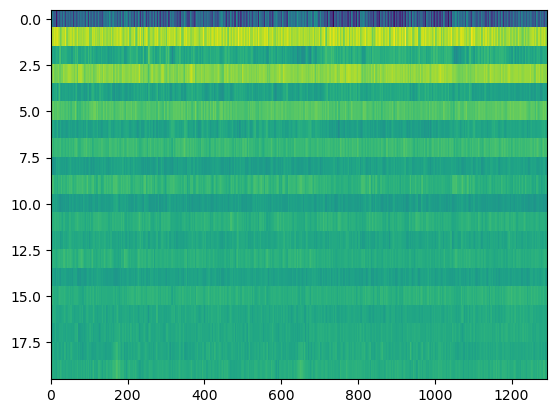

In [16]:
mfcc = get_mfcc(example_file)

plt.imshow(mfcc, interpolation='nearest', aspect='auto')
plt.show()

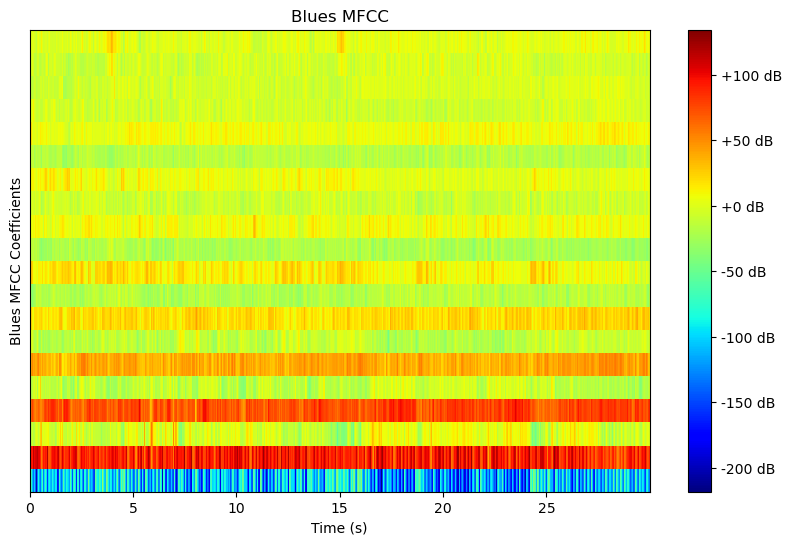

In [24]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfcc, x_axis='time', cmap='jet')  
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('Blues MFCC Coefficients')
plt.title('Blues MFCC')

plt.show()

In [51]:
rock = '/Users/kellyjara/Desktop/Test Data/genres_original/rock/rock_24.wav'
rock_mfcc = get_mfcc(rock)
rock_load, sr = librosa.load(rock)

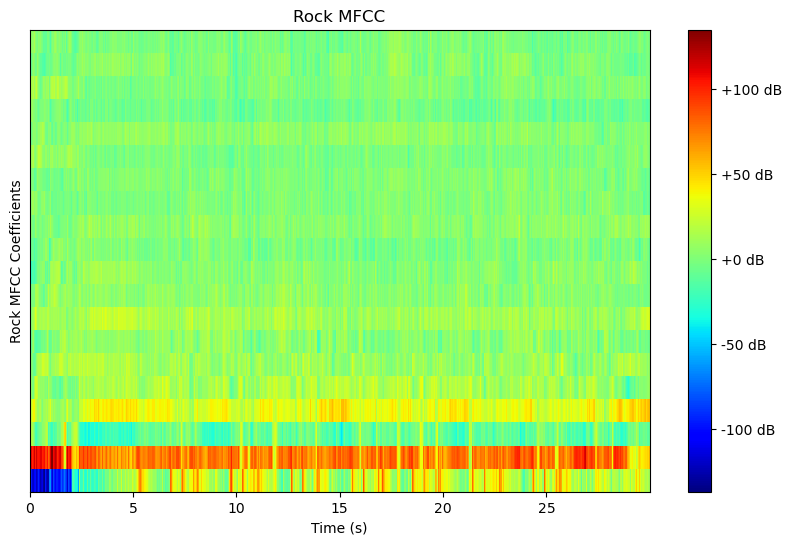

In [27]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(rock_mfcc, x_axis='time', cmap='jet')  
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('Rock MFCC Coefficients')
plt.title('Rock MFCC')

plt.show()

### Mel Spectrogram

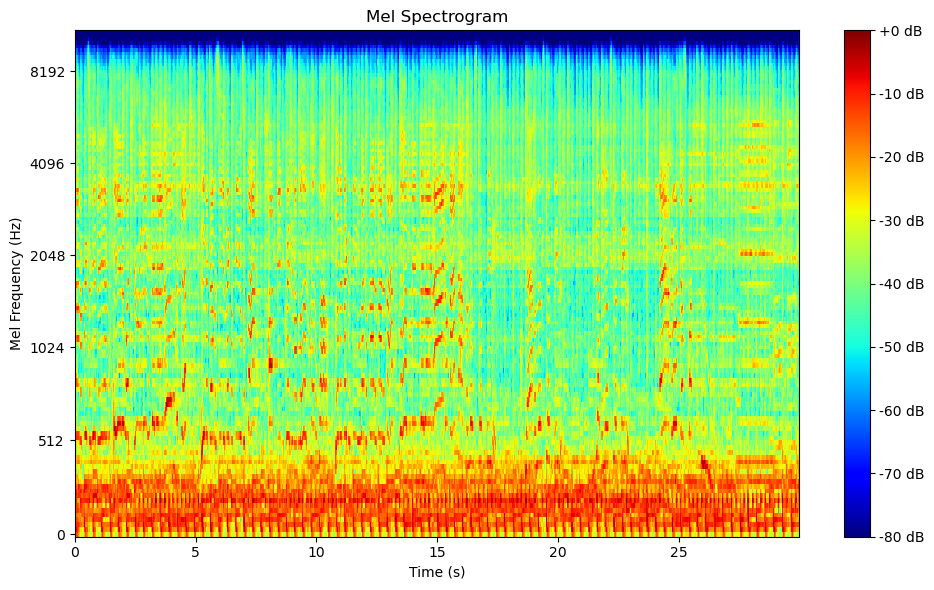

In [45]:
blues_melspec = get_melspectrogram(example_file)
plt.figure(figsize=(10, 6))
librosa.display.specshow(blues_melspec, x_axis='time', y_axis='mel', sr=sr, hop_length=512, cmap='jet')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency (Hz)')
plt.title('Mel Spectrogram')
plt.tight_layout()

plt.show()

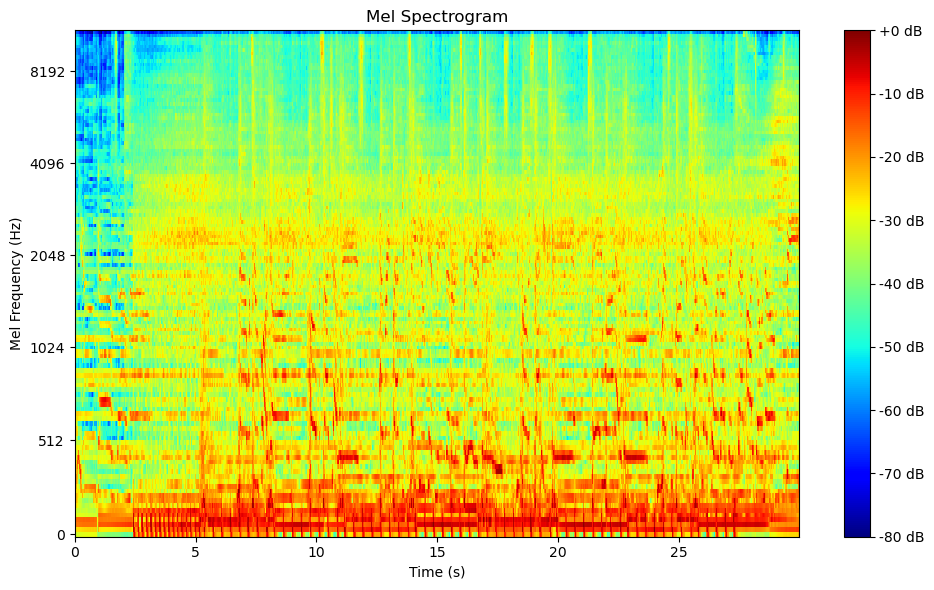

In [47]:
rock_melspec = get_melspectrogram(rock)
plt.figure(figsize=(10, 6))
librosa.display.specshow(rock_melspec, x_axis='time', y_axis='mel', sr=sr, hop_length=512, cmap='jet')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('Mel Frequency (Hz)')
plt.title('Mel Spectrogram')
plt.tight_layout()

plt.show()

In [ ]:
plt.savefig('blues_melspec.png', dpi=300, bbox_inches='tight', transparent=True)
